## Type I and Type II error


*   Type-I Error [FP] : When we try to predict relationship between dependent and independent variable and our hypothesis is False
*   Type-II Error [FN] : Rejection of True NULL Hypothesis ( Assumption )

## Levels of Significance :

*   6-sigma (99% area covered) : 0.05 to 0.01 range for acceptance
*   -6sigma to 0 to +6sigma

## T-test :
*   we can use T-test to for various degrees of freedom associated with your data DOF = no of samples - 1 = n-1
*   we can compare two means with T-test

## Anova : Analysis Of Variance
*   mean of samples and testing null hypothesis , no significance difference between means of samples.

## Chi-square : works on Categorical Data
*   compares observed frequency repetation of observation


In [159]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd

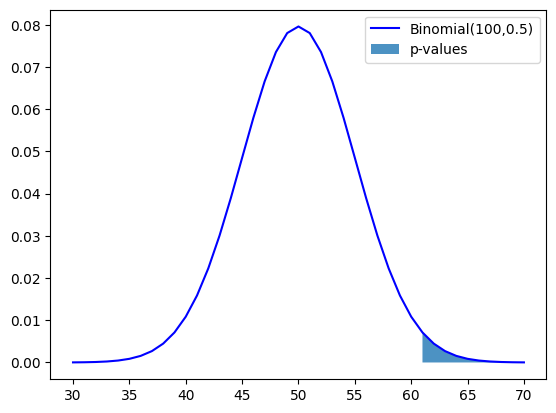

In [160]:
sucess = np.linspace(30,70,41)
# pmf = probability mass function
plt.plot(sucess, scipy.stats.binom.pmf(sucess, 100,0.5),'b-',label="Binomial(100,0.5)")
upper_sucess = sucess[sucess>60]
plt.fill_between(upper_sucess,0,scipy.stats.binom.pmf(upper_sucess,100,0.5),alpha=.8,label="p-values")
_ = plt.legend()
# commilative distribution function
pval = 1-scipy.stats.binom.cdf(60,100,0.5)

In [161]:
df = pd.read_csv("https://raw.githubusercontent.com/dev-sajal/EDA-weather-data/master/question/data.csv")
df.head(10)

,Day,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
0,1/01/2009,37.8,35,12.7,29.7,26.4,36.8,274,0.0,0.0,0.0,40.1,34.5,44,27,29.762,29.596,41.4,59.0,40.1
1,2/01/2009,43.2,32,14.7,29.5,12.8,18.0,240,0.0,0.0,0.0,52.8,37.5,43,16,29.669,29.268,35.7,51.0,52.8
2,3/01/2009,25.7,60,12.7,29.7,8.3,12.2,290,0.0,0.0,0.0,41.2,6.7,89,35,30.232,29.260,25.3,38.0,41.2
3,4/01/2009,9.3,67,0.1,30.4,2.9,4.5,47,0.0,0.0,0.0,19.4,-0.0,79,35,30.566,30.227,12.7,20.0,32.0
4,5/01/2009,23.5,30,-5.3,29.9,16.7,23.1,265,0.0,0.0,0.0,30.3,15.1,56,13,30.233,29.568,38.0,53.0,32.0
5,6/01/2009,24.8,42,4.6,29.8,16.0,23.9,276,0.0,0.0,0.0,29.5,19.7,57,27,29.879,29.637,29.9,48.0,32.0
6,7/01/2009,34.2,60,21.6,29.7,20.4,30.0,276,0.0,0.0,0.0,39.1,27.3,86,46,29.860,29.602,38.0,54.0,39.1
7,8/01/2009,42.1,41,20.0,29.8,17.5,25.2,265,0.0,0.0,0.0,51.3,36.9,53,28,29.883,29.627,35.7,49.0,51.3
8,9/01/2009,30.3,46,11.4,30.0,6.9,10.6,292,0.0,0.0,0.0,41.5,19.2,82,27,30.446,29.575,24.2,36.0,41.5
9,10/01/2009,26.2,38,3.6,30.4,18.2,24.6,258,0.0,0.0,0.0,31.9,22.5,48,29,30.489,30.291,31.1,46.0,32.0


In [162]:
df.columns

Index(['Day', 'Average temperature (°F)', 'Average humidity (%)',
       'Average dewpoint (°F)', 'Average barometer (in)',
       'Average windspeed (mph)', 'Average gustspeed (mph)',
       'Average direction (°deg)', 'Rainfall for month (in)',
       'Rainfall for year (in)', 'Maximum rain per minute ',
       'Maximum temperature (°F)', 'Minimum temperature (°F)',
       'Maximum humidity (%)', 'Minimum humidity (%)', 'Maximum pressure ',
       'Minimum pressure ', 'Maximum windspeed (mph)',
       'Maximum gust speed (mph)', 'Maximum heat index (°F)'],
      dtype='object')

In [163]:
df['Maximum windspeed (mph)'].std()

13.060875060425204

In [164]:
df1= df['Average temperature (°F)'].values
# print(np.percentile(df,0.75)-np.percentile(df,0.5))
np.quantile(df1,0.75)-np.quantile(df1,0.5)

12.200000000000003

In [165]:
temp = df['Average temperature (°F)']
dew = df['Average dewpoint (°F)']
temp.corr(dew)

0.7596091253567397

In [166]:
df2 = df.groupby(df['Day']).sum().reset_index()
df2['Average humidity (%)'].min()

9

In [167]:
data = df.groupby('Day')
data['Maximum gust speed (mph)'].median().max()

255.3

In [168]:
month = df.Day
df['index_month'] =  month.str.split("/").str[1]
df['year'] = month.str.split("/").str[2]
df['index_month']=  df.index_month.replace({'01':'January','02':'February','03':'March','04':'April','05':'May','06':'June','07':'July','08':'August','09':'September','10':'October', '11':'November', '12':'December'})


In [169]:
df


,Day,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),index_month,year
0,1/01/2009,37.8,35,12.7,29.7,26.4,36.8,274,0.00,0.00,...,34.5,44,27,29.762,29.596,41.4,59.0,40.1,January,2009
1,2/01/2009,43.2,32,14.7,29.5,12.8,18.0,240,0.00,0.00,...,37.5,43,16,29.669,29.268,35.7,51.0,52.8,January,2009
2,3/01/2009,25.7,60,12.7,29.7,8.3,12.2,290,0.00,0.00,...,6.7,89,35,30.232,29.260,25.3,38.0,41.2,January,2009
3,4/01/2009,9.3,67,0.1,30.4,2.9,4.5,47,0.00,0.00,...,-0.0,79,35,30.566,30.227,12.7,20.0,32.0,January,2009
4,5/01/2009,23.5,30,-5.3,29.9,16.7,23.1,265,0.00,0.00,...,15.1,56,13,30.233,29.568,38.0,53.0,32.0,January,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,24/10/2018,45.9,53,27.5,29.8,2.7,4.6,282,0.85,6.86,...,35.9,81,23,29.947,29.710,12.7,19.6,57.2,October,2018
3276,25/10/2018,46.7,40,22.7,29.8,4.5,7.2,283,0.85,6.86,...,35.0,60,19,29.933,29.682,13.8,19.6,61.8,October,2018
3277,26/10/2018,48.4,35,21.6,29.8,9.7,14.4,283,0.85,6.86,...,42.6,48,19,29.979,29.759,20.7,31.1,58.7,October,2018
3278,27/10/2018,53.3,37,26.6,29.8,10.3,14.8,282,0.85,6.86,...,38.3,78,24,29.935,29.650,28.8,38.0,64.5,October,2018


In [170]:
data=df.groupby('index_month')['Maximum gust speed (mph)'].median()
data[(data.values==data.max())]

index_month
February    34.5
Name: Maximum gust speed (mph), dtype: float64

In [171]:
# range = df[((df['index_month'] =='March') and (df['year']>=2010)) and ((df['index_month']=='May') and (df['year']<=2012))]
df['year'] = df['year'].astype(int)

In [172]:
range = df[((df['index_month'] =='March') & (df['year']>=2010)) | ((df['index_month']=='May') & (df['year']<=2012))]
range['Average temperature (°F)'].mean()

40.834090909090904

In [173]:
data = df[(df['index_month']=='December') & (df['year']==2010)]
d1 = data['Average temperature (°F)'].min()
d2 = data['Average temperature (°F)'].max()
d2-d1

44.8

In [174]:
df['min-max'] = df['Maximum pressure ']-df['Minimum pressure ']

In [175]:
data=df[df['min-max'].max()==df['min-max']]
data

,Day,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),index_month,year,min-max
3067,23/03/2018,42.0,59,28.1,29.5,12.9,19.0,279,0.09,0.09,...,90,20,29.868,13.266,27.6,38.0,51.4,March,2018,16.602


In [176]:
data = df[df['Average barometer (in)'].median()==df['Average barometer (in)']]
data.Day.count()

534

In [180]:
std1 = df['Average temperature (°F)'].std()
mean1 = df['Average temperature (°F)'].mean()
df[(df['Average temperature (°F)']>=std1-mean1)&(df['Average temperature (°F)']<=std1+mean1)]['Day'].count()

2641